In [2]:
#read csv file and create dataframe

import pandas as pd

chewy_df=pd.read_csv('chewy_review.csv')


In [6]:
chewy_df=chewy_df[['date', 'reviewContent', "reviewTitle"]].copy()

#Add year column
chewy_df['year']=chewy_df.date.apply(lambda x: int(x[:4]))
#Keep year 2019
chewy_df_past2018=chewy_df[chewy_df.year==2019].copy()


In [7]:
chewy_df_past2018['review']=chewy_df_past2018['reviewContent'].str.cat(chewy_df_past2018['reviewTitle'],sep=" ")

In [13]:
#Convert review to list
chewy_review=chewy_df_past2018['review'].apply(lambda x: str(x))
chewylst=chewy_review.tolist()

# convert list of string to big string
review_big_string=" ".join (chewylst)

import re

# Convert all the string to lower cases
review_big_string=review_big_string.lower()
# \S+ means anything that is not an empty space
review_big_string = re.sub('http\S*', '', review_big_string)
# \s+ means all empty space (\n, \r, \t)
review_big_string =  re.sub('\s+', ' ', review_big_string)


In [14]:
#filtering
import re
review_big_string=re.sub('[^\w\s]', '', review_big_string )

In [16]:
#Import stop word
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
# Add "dog", "food" to the stop word for better visualization

In [19]:
stop.append('dog')
stop.append('food')

In [20]:
review_big_string= " ".join(word for word in review_big_string.split() if word not in stop)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
review_big_string = ' '.join([stemmer.stem(word) for word in review_big_string.split()])


In [22]:
#find root of the words

import nltk
nltk.download('wordnet')
  
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()
review_big_string = lemztr.lemmatize(review_big_string)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laptop2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


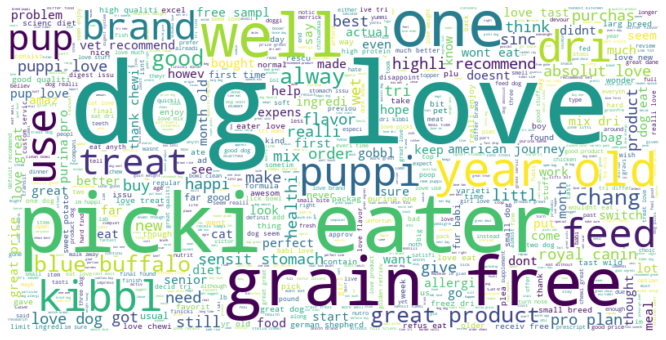

In [24]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

# generate word cloud
wc.generate(review_big_string)
import matplotlib.pyplot as plt
%matplotlib inline
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()